## Import Necessasary libraries 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.cluster import KMeans
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

##  Import dataset

In [2]:
wine_data=pd.read_csv("wine.csv")

In [3]:
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Data Understanding

In [4]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
wine_data[wine_data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Correlation Matrix and Heatmap

In [8]:
wine_data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


<AxesSubplot:>

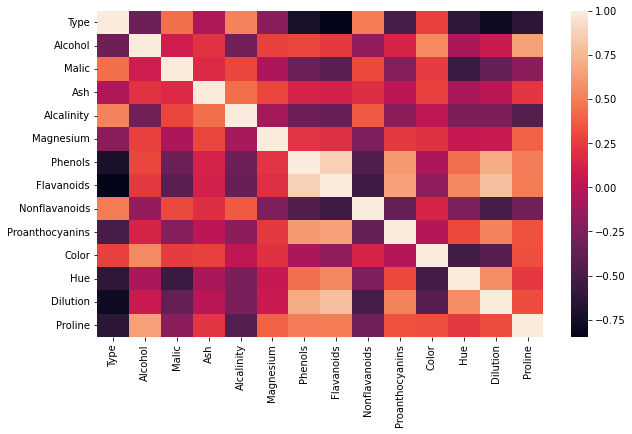

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(wine_data.corr())

###  Data Preprocessing:

In [10]:
wine_data.shape

(178, 14)

In [11]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [12]:
wine_data_1=wine_data.drop(labels="Type",axis=1)

In [13]:
wine_data_1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
wine_data_1.shape

(178, 13)

###  Standardization:

In [15]:
scaler = StandardScaler()

In [16]:
wine_data_scaled= scaler.fit_transform(wine_data_1)

In [17]:
wine_data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Optimum number of clusters :

##  CLUSTER VALIDATION TECHNIQUES:

###    1. Elbow Method
###    2. Silhouette score
###    3.Calinski harabasz score

###  1. Elbow method:

In [18]:
wcss=  []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_data_scaled)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1659.0079672511504,
 1278.7607763668154,
 1175.7051928197127,
 1113.0208821682086,
 1044.0780493140435,
 999.5493686263304,
 951.4917384013692,
 889.5309779249253,
 851.8813851482951,
 842.2251528844214,
 790.7665737168923,
 767.0493564324911,
 734.6641958447948,
 730.2662463623464,
 704.2862019154315,
 679.4883691163437,
 674.770253970282,
 633.4142467452984,
 625.8313390157091]

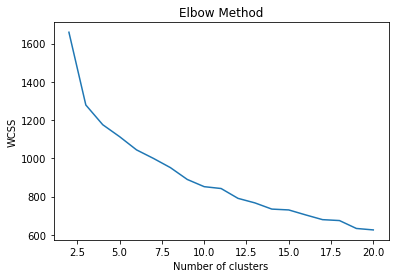

In [20]:
plt.plot(range(2, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Observation:

###  it gives n_cluster==3

### 2.   Silhouette (clustering):

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [22]:
X=wine_data_scaled

#### setting the range

In [23]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12]

For n_clusters = 2 The average silhouette_score is : 0.26831340971052126
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
For n_clusters = 4 The average silhouette_score is : 0.24519129323772165
For n_clusters = 5 The average silhouette_score is : 0.23223087806001866
For n_clusters = 6 The average silhouette_score is : 0.23533337693317755
For n_clusters = 7 The average silhouette_score is : 0.1544360375226889
For n_clusters = 8 The average silhouette_score is : 0.14706734078306893
For n_clusters = 9 The average silhouette_score is : 0.16630639639166148
For n_clusters = 10 The average silhouette_score is : 0.13462903548660346
For n_clusters = 11 The average silhouette_score is : 0.13901152310384288
For n_clusters = 12 The average silhouette_score is : 0.13037695295048546


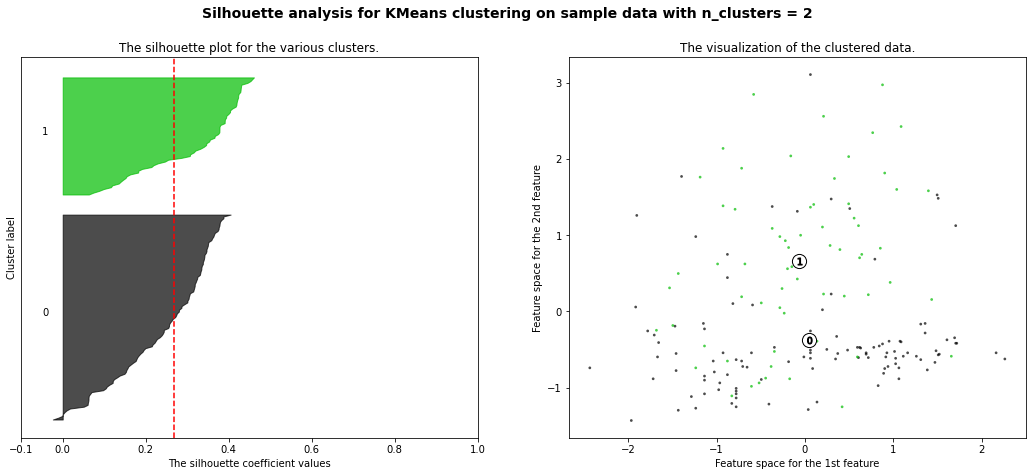

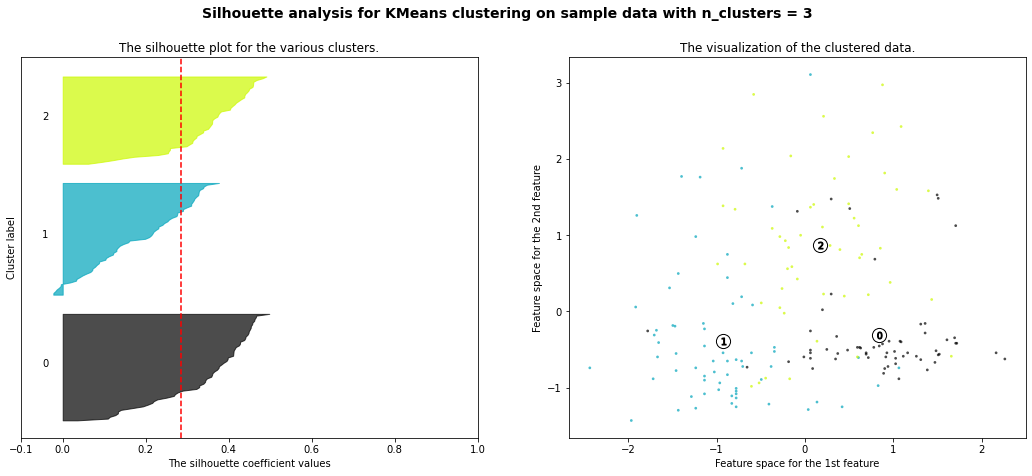

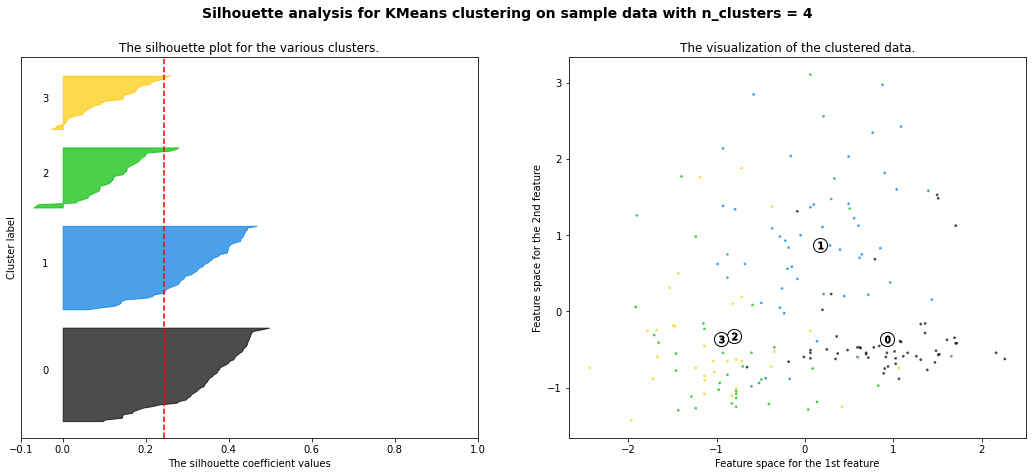

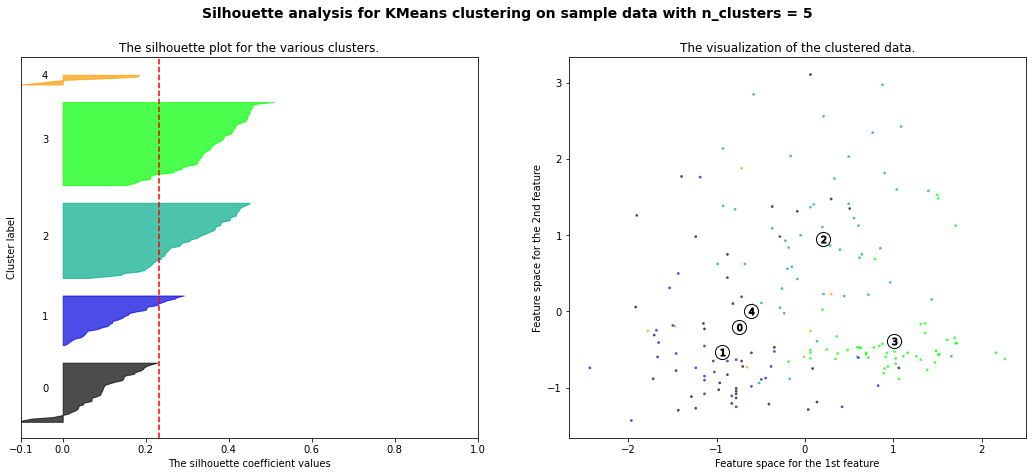

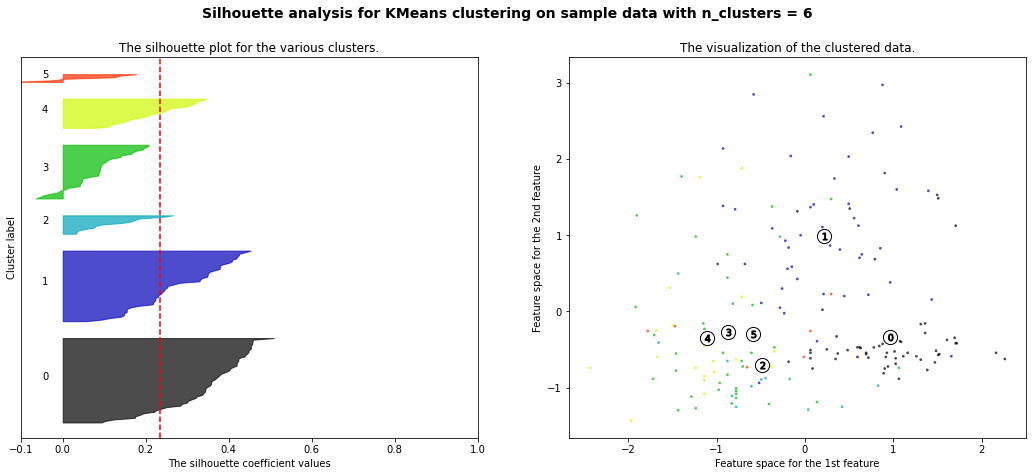

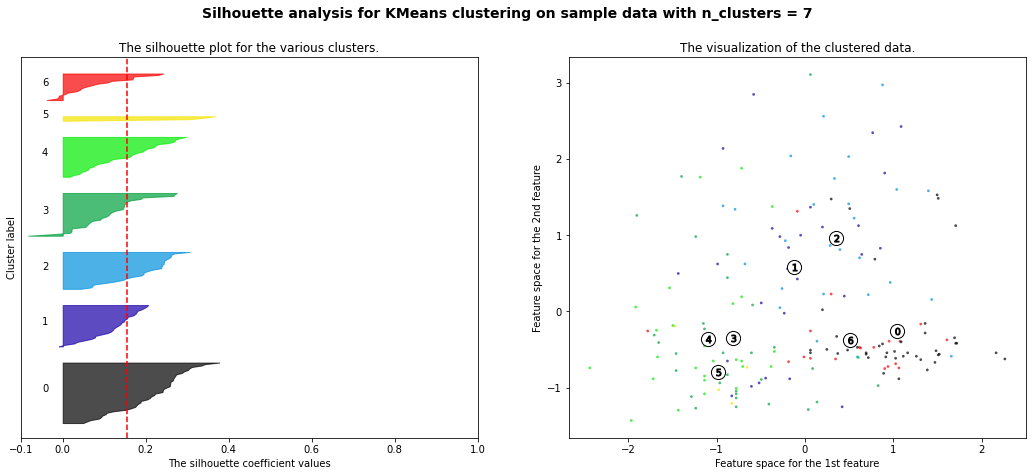

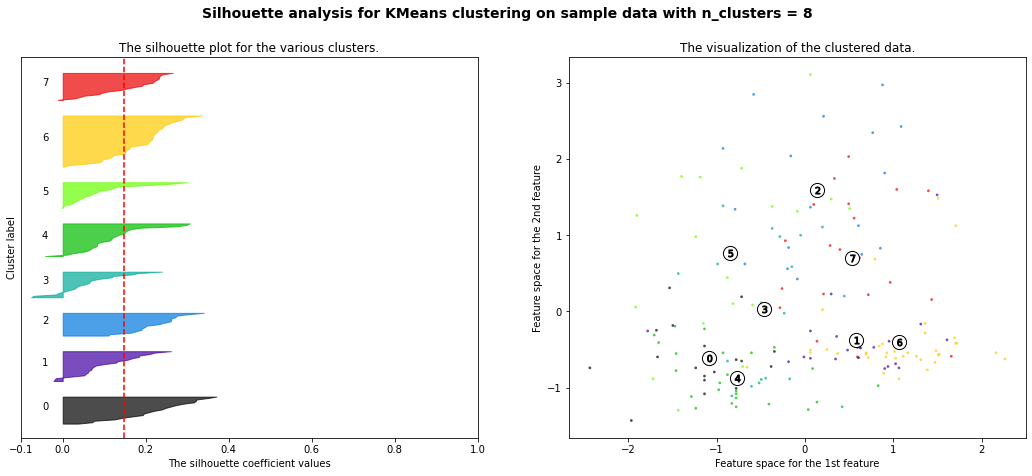

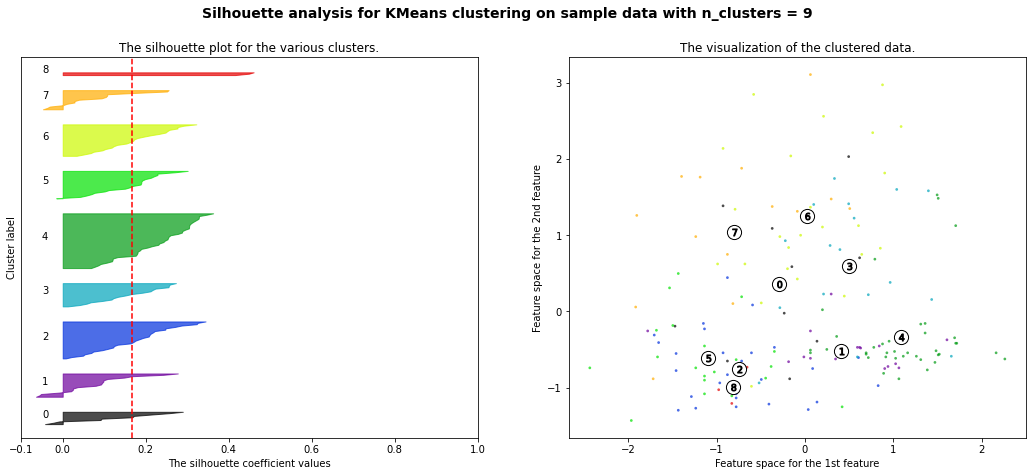

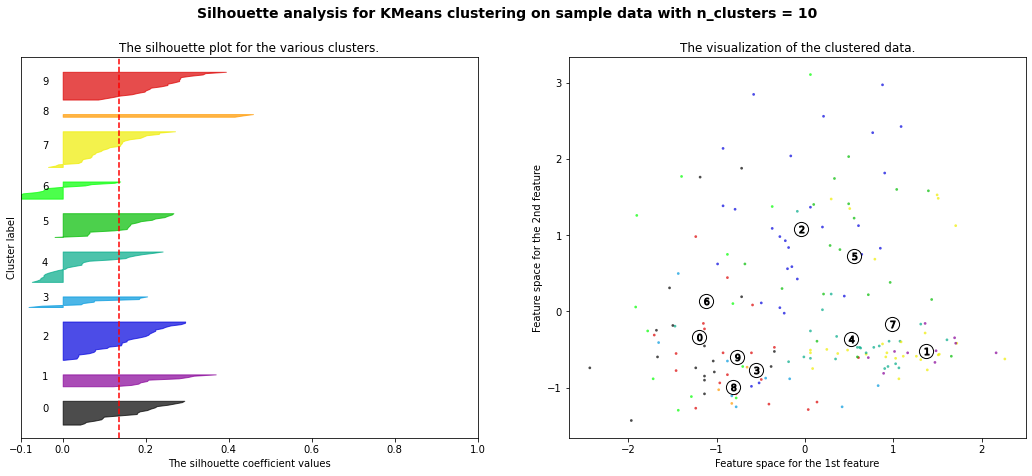

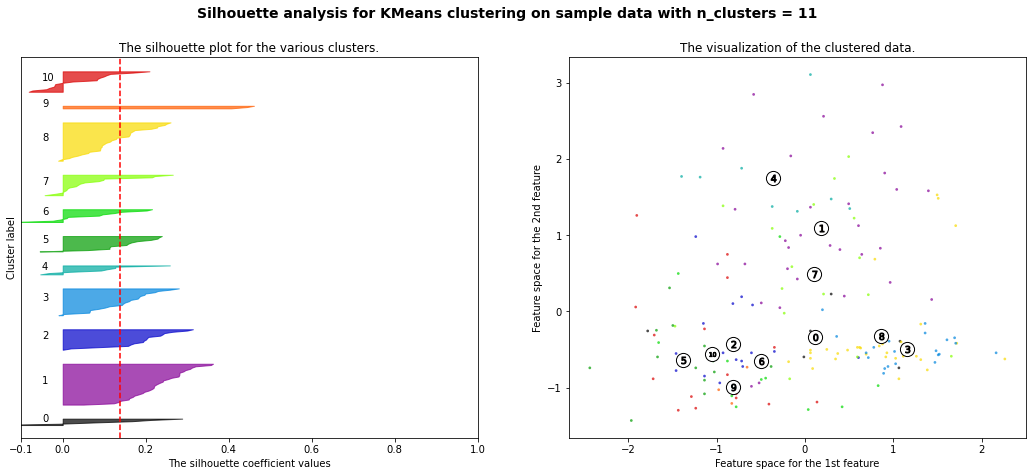

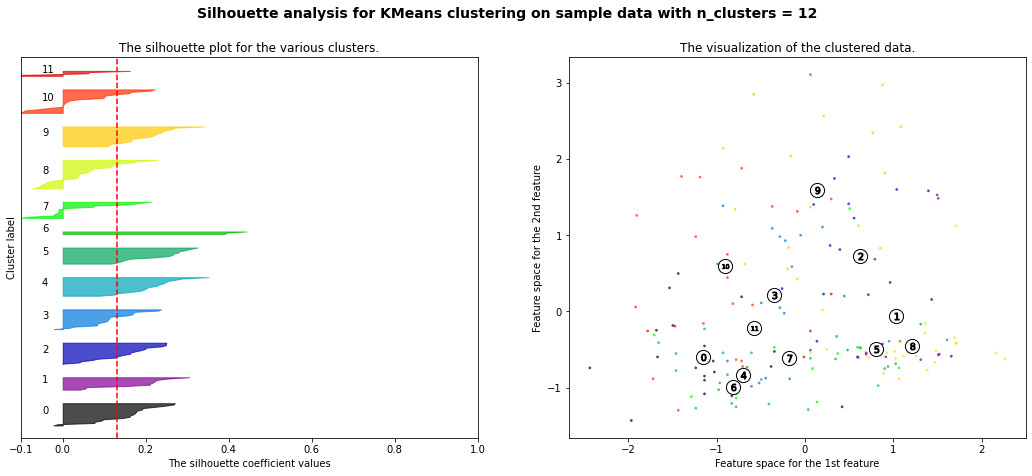

In [24]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

###  observation

### it gives n_cluster ==3

## Clustering before PCA

## Clustering with Original data:

## 1. K-means Clustering:

In [25]:
kmeans_1=KMeans(3, random_state=None)

In [26]:
kmeans_1.fit(wine_data_scaled)

KMeans(n_clusters=3)

In [27]:
kmeans_1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [28]:
kmeans_1.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [29]:
wine_data_2=wine_data_1.copy()

In [30]:
wine_data_2["clusterid"]=kmeans_1.labels_

In [31]:
wine_data_2.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


### Bar plot

<Figure size 1152x720 with 0 Axes>

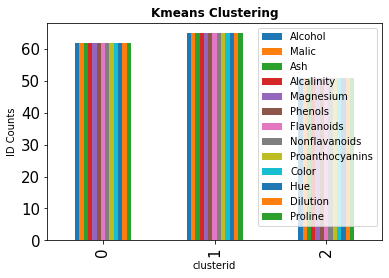

In [32]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
wine_data_2.groupby(['clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Grouping 

In [33]:
wine_data_2.groupby(['clusterid']).count()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusterid,,,,,,,,,,,,,
0,62,62,62,62,62,62,62,62,62,62,62,62,62
1,65,65,65,65,65,65,65,65,65,65,65,65,65
2,51,51,51,51,51,51,51,51,51,51,51,51,51


###  Inferences:

#### 1. we  have 3 cluster

#### 2. kmeans perform well clustering

### Finding the mean values of various features:

In [34]:
wine_data_2.groupby('clusterid').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


### Scatter plot

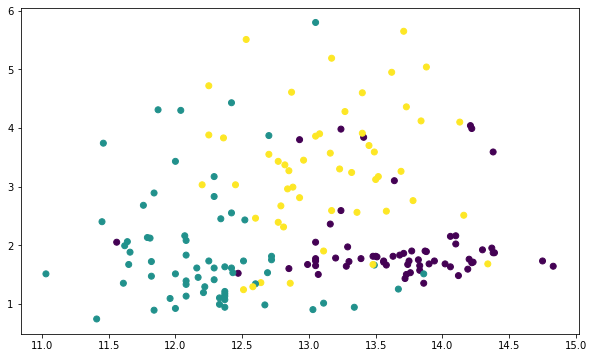

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(wine_data_2["Alcohol"], wine_data_2["Malic"], c=kmeans_1.labels_,cmap='viridis')
#centers =kmeans_1.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5)

##  2. Hierarchical Clustering:

### Define normal function:

In [36]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [37]:
wine_data_3=wine_data_1.copy()

In [38]:
df_norm = norm_func(wine_data_3)

In [39]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


### Dendrogram:

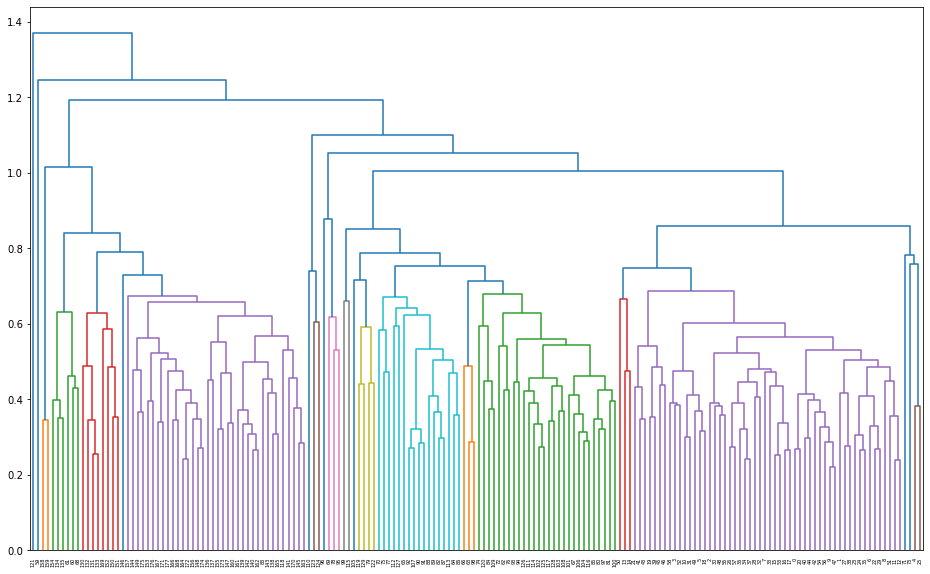

In [40]:
plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'),color_threshold=0.7)

### Model Building|| Training

In [41]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

In [42]:
y_hc = hc.fit_predict(df_norm)

In [43]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [44]:
wine_data_3["h_clusterid"]=Clusters

In [45]:
wine_data_3.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


###  Bar plot:

<Figure size 1152x720 with 0 Axes>

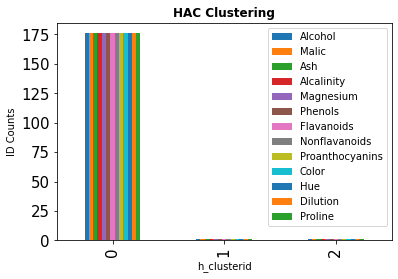

In [46]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
wine_data_3.groupby(['h_clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('HAC Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

###  Grouping:

In [47]:
wine_data_3.groupby(['h_clusterid']).count()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
h_clusterid,,,,,,,,,,,,,
0,176,176,176,176,176,176,176,176,176,176,176,176,176
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1


###  inferences:

####  1. we have 3 cluster

#### 2. almost all datapoints concentrated around cluster 0

#### HAC not perform well clustering:

###  Scatter plot:

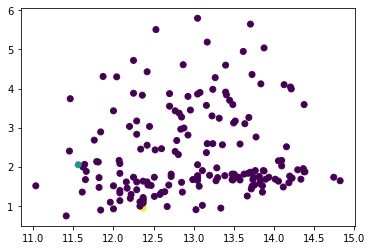

In [48]:
plt.scatter(wine_data_3["Alcohol"], wine_data_3["Malic"], c=hc.labels_,cmap='viridis')
#centers =kmeans_1.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5)

In [49]:
wine_data_3.groupby('h_clusterid').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_clusterid,,,,,,,,,,,,,
0,13.012386,2.345909,2.36733,19.494318,99.698864,2.291875,2.020227,0.361705,1.595966,5.070398,0.95708,2.610057,749.784091
1,11.560000,2.050000,3.23000,28.500000,119.000000,3.180000,5.080000,0.470000,1.870000,6.000000,0.93000,3.690000,465.000000
2,12.370000,0.940000,1.36000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.05000,1.820000,520.000000


# PCA Transformation:

In [50]:
wine_data_4=wine_data_1.copy()

In [51]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [52]:
scaled = std_scaler.fit_transform(wine_data_4)
scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [54]:
transformed = pca.fit_transform(scaled)

In [55]:
variance = pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631])

### Scree plot:

####   The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA)

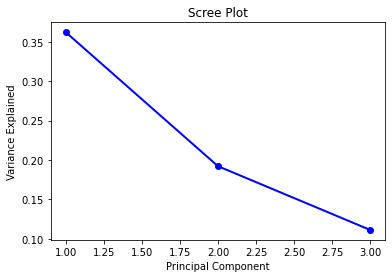

In [56]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [57]:
import numpy as np
np.cumsum(np.round(a = variance,decimals=4)*100)

array([36.2 , 55.41, 66.53])

In [58]:
transformed.shape

(178, 3)

###  Pca transformed Dataframe

In [59]:
transformed_df = pd.DataFrame(data=transformed, columns = ['PC1','PC2','PC3'])
transformed_df

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


###  Optimum number of cluster:

###  Elbow method:

In [60]:
wcss_1=  []
for i in range(2, 21):
    kmeans_2 = KMeans(n_clusters=i,random_state=0)
    kmeans_2.fit(scaled)
    wcss_1.append(kmeans_2.inertia_)

In [61]:
wcss_1

[1659.0079672511504,
 1278.7607763668154,
 1175.7051928197127,
 1113.0208821682086,
 1044.0780493140435,
 999.5493686263304,
 951.4917384013692,
 889.5309779249253,
 851.8813851482951,
 842.2251528844214,
 790.7665737168923,
 767.0493564324911,
 734.6641958447948,
 730.2662463623464,
 704.2862019154315,
 679.4883691163437,
 674.770253970282,
 633.4142467452984,
 625.8313390157091]

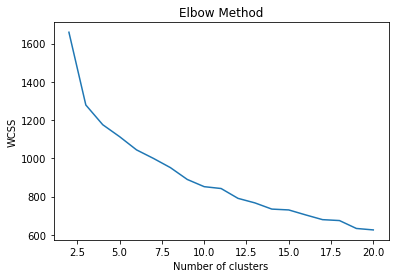

In [62]:
plt.plot(range(2, 21), wcss_1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###  Observation:
#### gives n_cluster==3

## K-Means clustering

### Model Building || Training

In [63]:
kmeans_3=KMeans(n_clusters=3,init='k-means++',n_init=10, max_iter=300, random_state=None)

In [64]:
kmeans_3.fit(transformed_df)

KMeans(n_clusters=3)

In [65]:
kmeans_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [66]:
kmeans_3.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

In [67]:
transformed_df_1=transformed_df.copy()

In [68]:
transformed_df_1['clusterid']=kmeans_3.labels_

In [69]:
transformed_df_1

,PC1,PC2,PC3,clusterid
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


### Bar plot

<Figure size 1152x720 with 0 Axes>

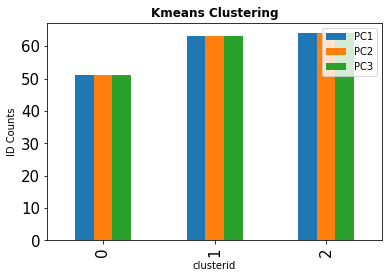

In [70]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
transformed_df_1.groupby(['clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

###  Grouping

In [71]:
transformed_df_1.groupby(['clusterid']).count()

,PC1,PC2,PC3
clusterid,,,
0,51,51,51
1,63,63,63
2,64,64,64


###  Inferences:

####  1. we have 3 clusters

#### 2. kmeans perform well clustering

###  Scatter plots with two features PC1 and PC2

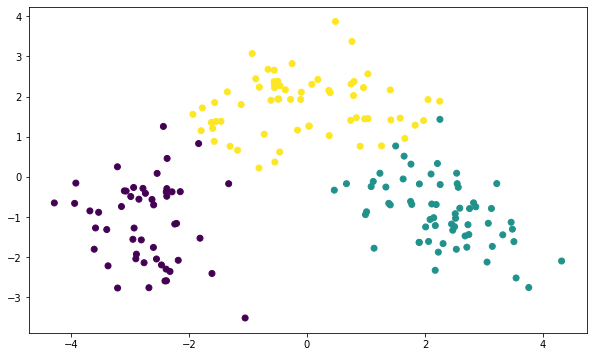

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(transformed_df_1['PC1'],transformed_df_1['PC2'], c=transformed_df_1['clusterid'],cmap='viridis')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

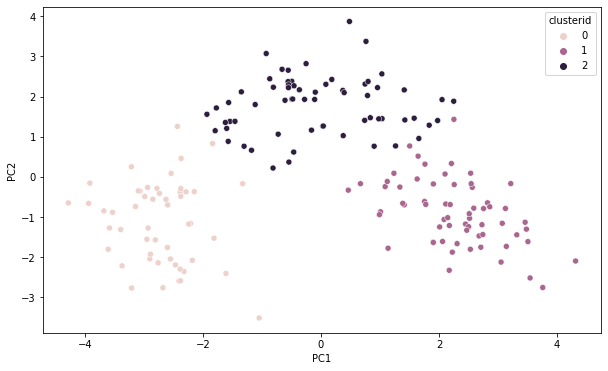

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=transformed_df_1['PC1'],y=transformed_df_1['PC2'],hue=transformed_df_1['clusterid'],style=None,data=transformed_df_1,hue_order=None,hue_norm=None)

## 3d plot: 3 Dimensional plot with 3 principal components

In [74]:
from mpl_toolkits import mplot3d

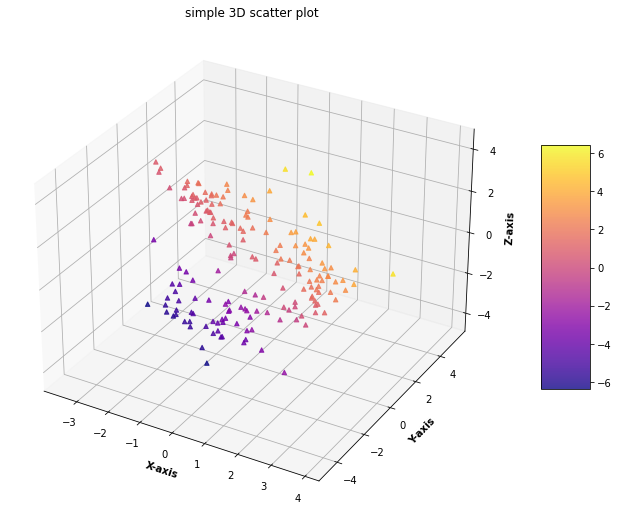

In [75]:
# Creating dataset
z =transformed_df_1['PC1']
x =transformed_df_1['PC2']
y=transformed_df_1['PC3']


fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)

my_cmap = plt.c=transformed_df_1['clusterid'].map='plasma'
#plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
					alpha = 0.8,
					c = (x + y + z),
					cmap = my_cmap,
					marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

### Finding the mean values of various features:

In [76]:
transformed_df_1.groupby('clusterid').agg(['mean'])

,PC1,PC2,PC3
,mean,mean,mean
clusterid,,,
0,-2.720036,-1.125651,-0.239093
1,2.275808,-0.894518,-0.002150
2,-0.072720,1.777544,0.192644


##  2. Hierarchical Clustering:

In [77]:
transformed_df_2=transformed_df.copy()

###  Dendrogram:

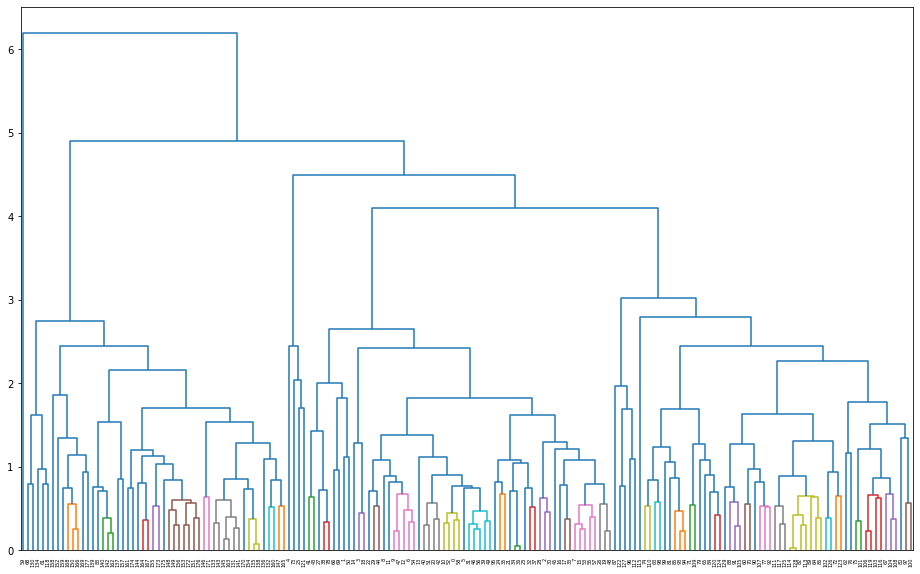

In [78]:
plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(transformed_df_2, method='average'),color_threshold=0.7)

In [79]:
hc_1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

In [80]:
y_hc_1 = hc.fit_predict(transformed_df_2)

In [81]:
Clusters_1=pd.DataFrame(y_hc_1,columns=['Clusters'])

In [82]:
transformed_df_2['h_clusterid'] = Clusters_1

In [83]:
transformed_df_2

,PC1,PC2,PC3,h_clusterid
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


###  Bar plot

<Figure size 1152x720 with 0 Axes>

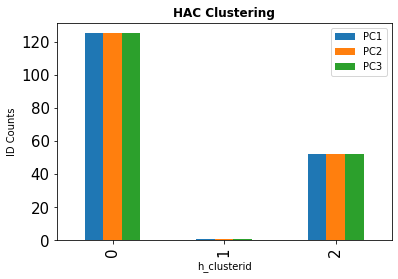

In [84]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

plt.figure(figsize=(16, 10))
transformed_df_2.groupby(['h_clusterid']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('HAC Clustering',fontsize='large',fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

###  Grouping

In [85]:
transformed_df_2.groupby(['h_clusterid']).count()

,PC1,PC2,PC3
h_clusterid,,,
0,125,125,125
1,1,1,1
2,52,52,52


### Inferences:

####  1. we have  3  clusters 

#### 2. large number of data points concentrated around  cluster 0

### Scatter plot: with two features PC1 and PC2

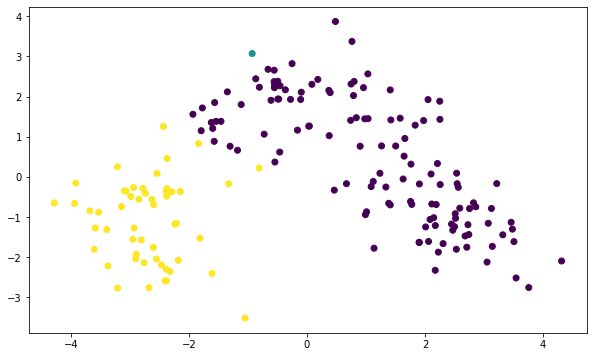

In [86]:
plt.figure(figsize=(10,6))
plt.scatter(transformed_df_2['PC1'],transformed_df_2['PC2'], c=transformed_df_2['h_clusterid'],cmap='viridis')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

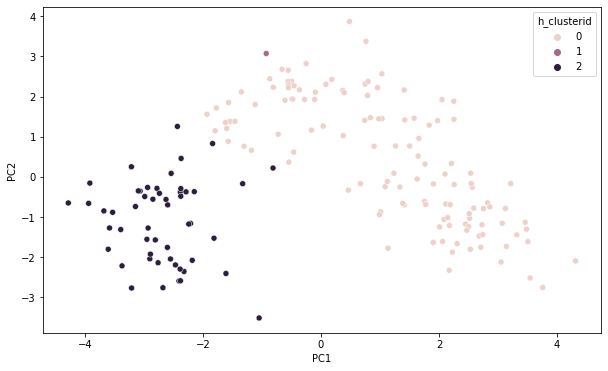

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=transformed_df_2['PC1'],y=transformed_df_2['PC2'],hue=transformed_df_2['h_clusterid'],style=None,data=transformed_df_1,hue_order=None,hue_norm=None)

###  3d    Scatter plot: 3 Dimensional with three Principal Components 

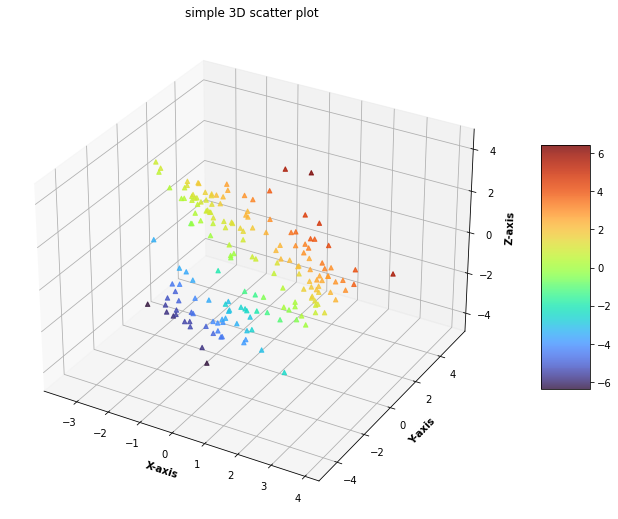

In [88]:
# Creating dataset
z =transformed_df_2['PC1']
x =transformed_df_2['PC2']
y =transformed_df_2['PC3']


fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.3,
		alpha = 0.2)

my_cmap = plt.c=transformed_df_2['h_clusterid'].map='turbo'
#plt.get_cmap('hsv')

# Creating plot
sctt = ax.scatter3D(x, y, z,
					alpha = 0.8,
					c = (x + y + z),
					cmap = my_cmap,
					marker ='^')

plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# show plot
plt.show()

###  Finding the mean values of various features:

In [89]:
transformed_df_2.groupby('h_clusterid').agg(['mean'])

,PC1,PC2,PC3
,mean,mean,mean
h_clusterid,,,
0,1.123706,0.432914,0.139887
1,-0.928582,3.073486,-4.585064
2,-2.683358,-1.099763,-0.248092
